## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2019-20 учебный год

### Домашнее задание №1

Задание выполнила: Кудрявцева Евгения Алексеевна

## Часть 1. Numpy

In [817]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.4, вес контрольной - 0.2, вес самостоятельных - 0.1. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [940]:
def result_mark(weights: np.array, marks: np.array) -> int:
    total = round(sum(weights * marks))
    return total

In [941]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 10, 8, 6])

assert result_mark(weights, marks) == 8

In [942]:
weights = np.array([0.3, 0.4, 0.2, 0.1])
marks = np.array([7, 0, 8, 6])

assert result_mark(weights, marks) == 4

### 2

Напишите функцию, меняющую каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [943]:
def change_array(array: np.array, number: int) -> np.array:
    index = np.arange(0, array.shape[0], 3)
    array[index]=number
    return array

In [944]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111

change_array(array, number)

assert np.allclose(change_array(array, number), np.array([-111, 5, 1, -111, -3, 22, -111]))

In [945]:
array = np.array([3, 14, 15, 92, 6])
number = 8

assert np.allclose(change_array(array, number), np.array([8, 14, 15, 8, 6]))

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**).

In [946]:
def find_close(array1: np.array, array2: np.array,
               precision: float) -> np.array:
    
    modules = abs(array1 - array2)
    
    return np.where(modules <= precision)[0]

In [947]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4.0,  3, 0, -1.2])
precision = 0.5
res = find_close(array1, array2, precision)

assert res.ndim == 1

assert np.allclose(res, np.array([0, 1, 3, 6]))

In [948]:
array1 = np.array([3.1415, 2.7182, 1.6180, 6.6261])
array2 = np.array([6.6730, 1.3807, -1,     6.0222])
precision = 1.7
res = find_close(array1, array2, precision)

assert res.ndim == 1
assert np.allclose(res, np.array([1, 3]))

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [949]:
def block_matrix(block: np.array) -> np.array:
    row = block.shape[0]
    col = block.shape[1]
    a = np.zeros((row*2,col*2))
    ind = np.arange(0, row, 1)
    a[ind, :col] = block
    a[ind, col:] = block
    a[row:] = a[ind]
    a

    return a

In [950]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
   block_matrix(block),
   np.array([[1, 3, 3, 1, 3, 3],
             [7, 0, 0, 7, 0, 0],
             [1, 3, 3, 1, 3, 3],
             [7, 0, 0, 7, 0, 0]])
)

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

Элементы матрицы считать целочисленными.

In [951]:
def diag_prod(matrix: np.array) -> int:
    rows = matrix.shape[0]
    index = np.arange(0, rows, 1)
    
    matrix = matrix[index, index]
    matrix = matrix[matrix != 0]
    return np.multiply.reduce(matrix)


In [952]:

matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])
                   



assert diag_prod(matrix) == 750

# 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$

Учтите, что в вашем матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [953]:
import sys
def normalize(matrix: np.array) -> np.array:
    
    m = np.mean(matrix, axis=0)
    
    disp = np.std(matrix, axis=0)
    disp = np.where(disp == 0, 1, disp) #избежим деления на 0 и в итоговой матрице получим значение 0, так как эта величина равна среднему
    
    matrix = (matrix-m)/disp

    return matrix

In [954]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])

normalize(matrix)   
assert np.allclose(
    normalize(matrix),
    np.array([[ 0.70711, -0.39223,  0.46291],
              [-1.41421,  1.37281,  0.92582],
              [ 0.70711, -0.98058, -1.38873]])
)

In [955]:
matrix = np.array([[-7, 2, 42], [2, 10, 50], [5, 4, 10]])

assert np.allclose(
    normalize(matrix),
    np.array([[-1.37281, -0.98058,  0.46291],
              [ 0.39223,  1.37281,  0.92582],
              [ 0.98058, -0.39223, -1.38873]])
)

### 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите $0$). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [956]:
def antiderivative(coefs: np.array) -> np.array:
    
    coefs = coefs[::-1]
    arr = np.zeros((coefs.shape[0] + 1))
    inds = np.arange(0, coefs.shape[0])
    arr[inds + 1] = coefs[inds]/(inds+1)
    
    return arr[::-1]

In [957]:
coefs = np.array([4, 6, 0, 1])
antiderivative(coefs)
assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 0.])
)

In [958]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 0.])
)

### 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [959]:
def make_symmetric(matrix: np.array) -> np.array:
    m2 = matrix.transpose().copy()
    ind = np.arange(0, matrix.shape[0], 1)
    matrix[ind, ind] = 0
    return matrix+m2

In [960]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])


assert np.allclose(
    make_symmetric(matrix),
    np.array([[ 1,  2,  3,  4],
              [ 2,  5,  6,  7],
              [ 3,  6,  8,  9],
              [ 4,  7,  9, 10]])
)

In [961]:
matrix = np.array([[10, 21, 32, 49], [0, 53, 62, 78], [0, 0, 82, 92], [0, 0, 0, 10]])

assert np.allclose(
    make_symmetric(matrix),
    np.array([[10, 21, 32, 49],
              [21, 53, 62, 78],
              [32, 62, 82, 92],
              [49, 78, 92, 10]])
)

### 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [962]:
def construct_matrix(m: int, a: int, b: int) -> np.array:
    ind = np.arange(0,m,1)
    rows = np.arange(a,b+1,1)
    m1 = np.zeros((m, (b-a+1)))
    m1[ind] = rows
    return m1

In [963]:
m = 5
a = 3
b = 10

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10],
              [ 3,  4,  5,  6,  7,  8,  9, 10]])
)

In [964]:
m = 3
a = 2
b = 6

assert np.allclose(
    construct_matrix(m, a, b),
    np.array([[2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6],
              [2, 3, 4, 5, 6]])
)

### 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [965]:
def cosine_similarity(vec1: np.array, vec2: np.array) -> float:
    v1 = (vec1*vec1).sum()
    v2 = (vec2*vec2).sum()
    v12= (vec1 * vec2).sum()
    return v12/(v1**(1/2)*v2**(1/2))

In [966]:
vec1 = np.array([-2, 1,  0, -5, 4, 3, -3])
vec2 = np.array([ 0, 2, -2, 10, 6, 0,  0])



assert np.allclose(cosine_similarity(vec1, vec2), -0.25)

In [967]:
vec1 = np.array([-4, 2,  9, -8, 9, 0, -2])
vec2 = np.array([ 3, 2, -4, -1, 3, 2,  2])

assert np.allclose(cosine_similarity(vec1, vec2), -0.119929)

## Часть 2. Pandas и Matplotlib

In [1175]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

#### Размер:

In [1247]:
df = pd.read_csv("train.csv")
print(f'{df.shape[0]} строка\n{df.shape[1]} столбцов')

891 строка
12 столбцов


#### Первые 5 строк:

In [1248]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Последние 5 строк:

In [1249]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

In [1250]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**PassengerId** -- порядковый  
**Survived** -- бинарный  
**Pclass** -- порядковый  
**Name** -- категоральный  
**Sex** -- бинарный  
**Age** --  вещественный  
**SibSp** -- вещественный  
**Parch** -- вещественный  
**Fare** -- вещественный  
**Embarked** -- порядковый  
  

**Задача кластеризации**   
Сегментация выживших по классу, полу, возрасту  
**Задача регрессии**  
Сколько родственников ехало с каждым пассажиром? (Зависит ли выжил человек или нет от количества родственников на борту?)  
**Задача классификации**  
Разделить всех пассажиров в зависимости от класса

### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [1251]:
s = df[df['Survived'] == 1]
p = (s['Survived'].count()/df['PassengerId'].count())

f = s[s['Sex'] == 'female']['PassengerId'].count()
m = s[s['Sex'] == 'male']['PassengerId'].count()

s_f = f/(s['PassengerId'].count())
s_m = m/(s['PassengerId'].count())
print(f'Доля выживших: {p}\nДоля женщих среди выживших:{s_f}\nДоля мужчин среди выживших:{s_m}')

Доля выживших: 0.3838383838383838
Доля женщих среди выживших:0.6812865497076024
Доля мужчин среди выживших:0.31871345029239767


### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [1252]:
all_p = df.groupby('Pclass')['PassengerId'].count()

m = df[(df['Pclass']==3) & (df['Sex']=='male')]['PassengerId'].count() #сколько мужчтн
f = df[(df['Pclass']==3) & (df['Sex']=='female')]['PassengerId'].count() #сколько женщин

print(f'В каждом классе: {all_p}\n\nМужчин было больше на {m-f}')

В каждом классе: Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

Мужчин было больше на 203


### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

Цены билетов:
Минимальная сумма: 0.0
Средняя сумма: 32.2042079685746
Максимальная сумма: 512.3292

Сели в Саутгемптоне:
Минимальная сумма: 0.0
Средняя сумма: 27.07981180124218
Максимальная сумма: 263.0


Text(0.5, 1.0, 'Queenstown')

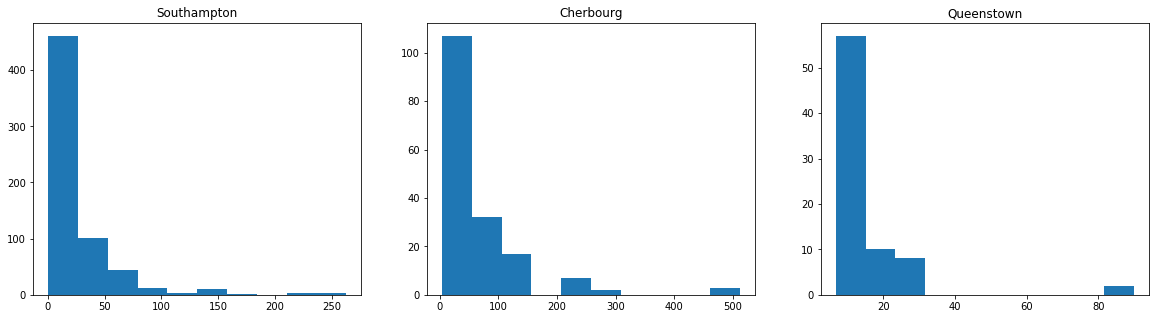

In [1253]:
from matplotlib.pyplot import hist
min_t = df['Fare'].min()
max_t = df['Fare'].max()
mean_t = df['Fare'].mean()
min_ts = df[df['Embarked']=='S']['Fare'].min()
max_ts = df[df['Embarked']=='S']['Fare'].max()
mean_ts = df[df['Embarked']=='S']['Fare'].mean()
     
print(f'Цены билетов:\nМинимальная сумма: {min_t}\nСредняя сумма: {mean_t}\nМаксимальная сумма: {max_t}\n\n'
      f'Сели в Саутгемптоне:\nМинимальная сумма: {min_ts}\nСредняя сумма: {mean_ts}\nМаксимальная сумма: {max_ts}')

#гистограмма
fig, ax = plt.subplots(1, 3, figsize=(20, 5))

ax[0].hist(df[df["Embarked"] == 'S']['Fare'])
ax[0].set_title('Southampton')

ax[1].hist(df[df["Embarked"] == 'C']['Fare'])
ax[1].set_title('Cherbourg')

ax[2].hist(df[df["Embarked"] == 'Q']['Fare'])
ax[2].set_title('Queenstown')


### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.  
**Для класса 2 и 3 почти везде значение столбца Cabin = NaN и он не несет особой информации, так как мы можем ее связать только с пассажирами первого класса, также и столбец Ticket: номер билета не дает никакой информации**

In [1254]:
df.drop(['Cabin','Ticket'], axis='columns', inplace=True)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')

### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [1255]:
pd.isna(df).sum()
#Age=177 Embarked=2
print(f"{pd.isna(df).sum()}\n\nПропуски в Embarked: {pd.isna(df['Embarked']).sum()}\nПропуски в Age: {pd.isna(df['Age']).sum()}")

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

Пропуски в Embarked: 2
Пропуски в Age: 177


### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

In [1256]:
#заменим неизвестный нам возраст на средний среди мужчин и женщин
f_age = df[df['Sex']=='female']['Age'].median()
m_age = df[df['Sex']=='male']['Age'].median()

df.loc[(df.Sex=='male') & (pd.isnull(df.Age)), 'Age'] = m_age
df.loc[(df.Sex=='female') & (pd.isnull(df.Age)), 'Age'] = f_age

df['Embarked'] = df['Embarked'].fillna('unknown') 

print(f"Пропуски в Embarked: {pd.isna(df['Embarked']).sum()}\nПропуски в Age: {pd.isna(df['Age']).sum()}")


Пропуски в Embarked: 0
Пропуски в Age: 0


### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

29.0
29.0
29.0


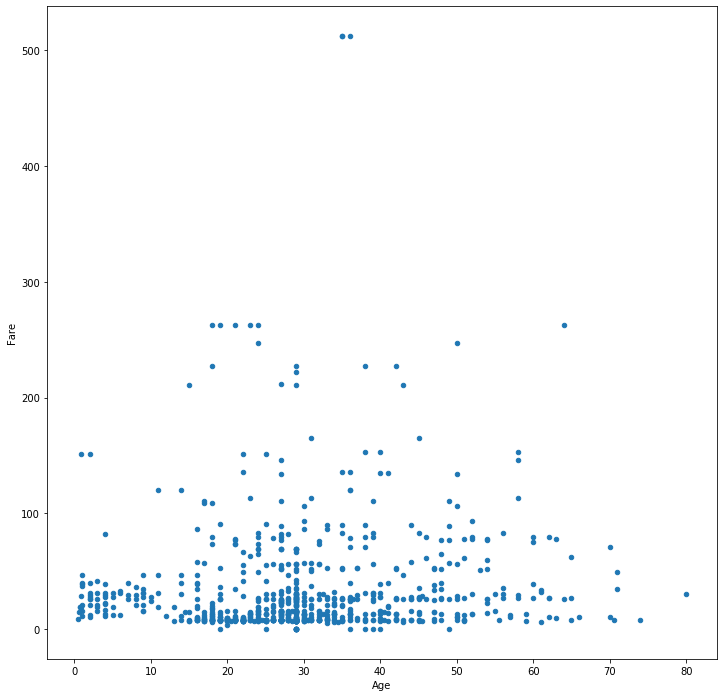

In [1259]:
min_t = df['Fare'].min()
max_t = df['Fare'].max()
mean_t = df['Fare'].mean()
median_t = df['Fare'].median()

low = df[(df['Fare'] >= min_t) & (df['Fare']<= median_t)]['Age'].median()
med = df[(df['Fare'] > median_t) & (df['Fare']<= mean_t)]['Age'].median()
high = df[(df['Fare'] > mean_t) & (df['Fare']<= max_t)]['Age'].median()
print(f'{low}\n{med}\n{high}')

#для каждой ценовой категории возраст (точнее медиана) одинаковая

df.plot(x='Age', y='Fare', kind='scatter', figsize=(12,12))
# по графику видно, что особой закономерности между возрастом и ценой нет

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

In [1260]:
# захотелось разделить всех пассажиров на 3 группы в зависимости от цены билета и класса (скорее всего класс и цена билета связаны на прямую)
df.groupby('Fare')['Survived'].sum()

min_t = df['Fare'].min()
max_t = df['Fare'].max()
mean_t = df['Fare'].mean()
median_t = df['Fare'].median()

low = df[(df['Fare'] >= min_t) & (df['Fare']<= median_t)]['Survived']
med = df[(df['Fare'] > median_t) & (df['Fare']<= mean_t)]['Survived']
high = df[(df['Fare'] > mean_t) & (df['Fare']<= max_t)]['Survived']
print(f'Доля выживших\nСамые дорогие билеты: {high.sum()/high.count()}\nБилет подешевле: {med.sum()/med.count()}\nДешевые билеты: {low.sum()/low.count()}')

s = df[df['Pclass'] == 1]['Survived']
c = df[df['Pclass'] == 2]['Survived']
q = df[df['Pclass'] == 3]['Survived']
print(f'1 класс: {s.sum()/s.count()}\n2 класс: {c.sum()/c.count()}\n3 класс: {q.sum()/q.count()}')
# получили даже схожие данные по долям выживших среди трех категорий, есть четкая зависимость от цены и класса (то есть цена и класс на прямую зависят)

Доля выживших
Самые дорогие билеты: 0.5971563981042654
Билет подешевле: 0.44635193133047213
Дешевые билеты: 0.2505592841163311
1 класс: 0.6296296296296297
2 класс: 0.47282608695652173
3 класс: 0.24236252545824846


### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [1261]:
a = df['SibSp'] + df['Parch'] + 1 
df['FamNumb'] = a

# фантазия у меня не оч, поэтому признак я добавлю группу по возрасту,
#чтобы удобнее было для разных возрастных групп смотреть признаки

df.loc[df.Age < 18, "GroupAge"] = 1
df.loc[(df['Age'] >= 18) & (df['Age'] < 50), 'GroupAge'] = 2
df.loc[df['Age'] >= 50, 'GroupAge'] = 3
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamNumb,GroupAge
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,2.0


### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

**Прямой зависимости выживаемости и возраста нет, но возможно она есть, если мы разделим людей на возрастные группы.
Сколько выжило детей, взрослых, пожилых. В каком классе они ехали?**

In [1262]:
s1 = df[(df.Survived==1) & (df.GroupAge==1)]
res1 = s1['PassengerId'].count()/df[df['GroupAge']==1]['PassengerId'].count()

s2 = df[(df.Survived==1) & (df.GroupAge==2)]
res2 = s2['PassengerId'].count()/df[df['GroupAge']==2]['PassengerId'].count()

s3 = df[(df.Survived==1) & (df.GroupAge==3)]
res3 = s3['PassengerId'].count()/df[df['GroupAge']==3]['PassengerId'].count()

print(f'Доля выживших детей: {res1}\nДоля выживших взрослых: {res2}\nДоля выживших пожилых: {res3}')
# если ты был ребенком, то шанс выжить был больше

print(s1.groupby('Pclass')['PassengerId'].count())
print(s2.groupby('Pclass')['PassengerId'].count())
print(s3.groupby('Pclass')['PassengerId'].count())
# чем выше класс, тем больше шансов было спастись, но для детей такой закономерности нет(но их выжило больше), что наверное и логично

Доля выживших детей: 0.5398230088495575
Доля выживших взрослых: 0.36079545454545453
Доля выживших пожилых: 0.36486486486486486
Pclass
1    11
2    21
3    29
Name: PassengerId, dtype: int64
Pclass
1    105
2     60
3     89
Name: PassengerId, dtype: int64
Pclass
1    20
2     6
3     1
Name: PassengerId, dtype: int64


### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

In [1263]:
# не получилось(((

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

In [1264]:
#это пол и место посадки, заменим цифрами
#male = 0, female = 0
#S = 1 C = 2 Q = 3 unknown = 4
df.dtypes
df.loc[df['Sex'] == 'male', 'Sex'] = 0
df.loc[df['Sex'] == 'female', 'Sex'] = 1

df.loc[df['Embarked'] == 'S','Embarked'] = 1
df.loc[df['Embarked'] == 'C','Embarked'] = 2
df.loc[df['Embarked'] == 'Q','Embarked'] = 3
df.loc[df['Embarked'] == 'unknown','Embarked'] = 4

df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
FamNumb          int64
GroupAge       float64
dtype: object

# Часть 3. Matplotlib

### 25

Отобразите гистограмму распределения возрастов для каждого класса пассажиров. В результате вы должны получить три гистограммы, которые необходимо отобразить друг рядом с другом, используя функцию `plt.subplots`. Каждая гистограмма должна быть нормирована. Обратите внимание на параметры `figsize`, `sharey` функции `plt.subplots`. Также полезными могут оказаться параметры `bins`, `ec`, `density` функции `plt.hist`, а также функции `set_xlabel`, `set_ylabel`, `set_title` и `plt.tight_layout`.

Text(0, 0.5, 'Normed number of passengers')

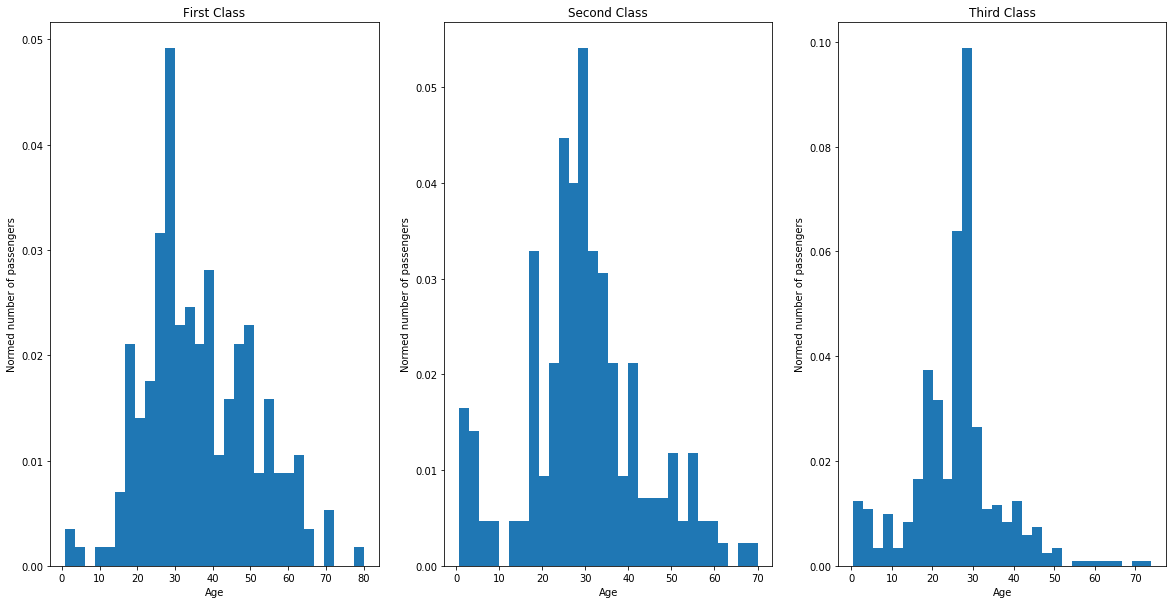

In [1265]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].hist(df[df['Pclass']==1]['Age'],bins=30, density=True)
ax[0].set_title('First Class')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Normed number of passengers')

ax[1].hist(df[df['Pclass']==2]['Age'], bins=30, density=True)
ax[1].set_title('Second Class')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Normed number of passengers')

ax[2].hist(df[df['Pclass']==3]['Age'],bins=30, density=True)
ax[2].set_title('Third Class')
ax[2].set_xlabel('Age')
ax[2].set_ylabel('Normed number of passengers')

### 26

Нарисуйте график косинуса для `x` от `-1` до `5`. Также пунктирной линией изобразите график синуса для `x` на том же промежутке. Укажите на графике легенду.

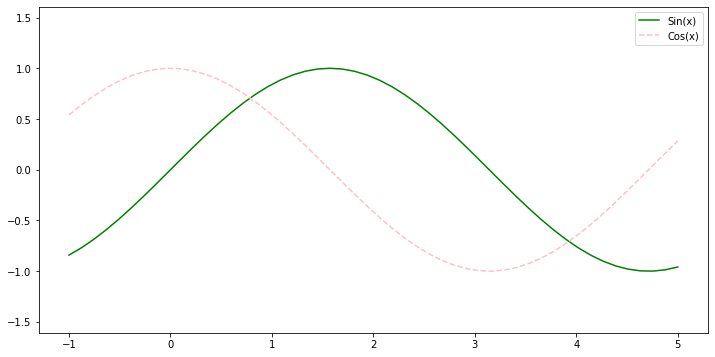

In [1245]:
x = np.linspace(-1, 5)
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, np.sin(x), '-', label='Sin(x)', color='green')
ax.plot(x, np.cos(x), '--', label='Cos(x)', color='pink')

ax.axis('equal')

leg = ax.legend()

### 27

Постройте диаграмму рассеяния (scatter plot) для пассажиров. Ось x должна обозначать возраст пассажира, ось y - стоимость его проезда. Обозначьте выживших и погибших пассажиров разными светами и маркерами. Также укажите на графике легенду.

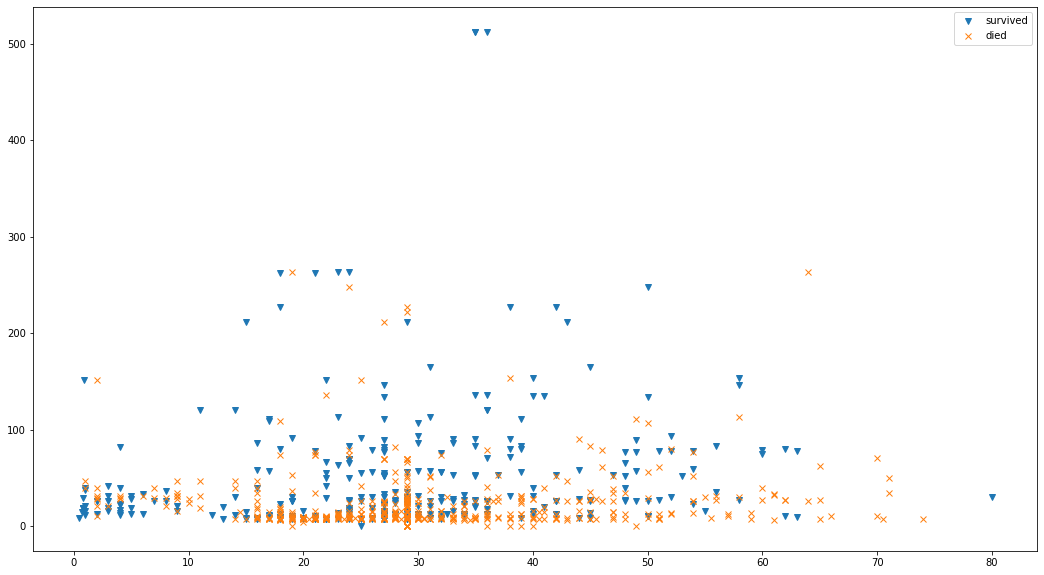

In [1246]:
fig, ax = plt.subplots(figsize=(18,10))

ax.plot(df[df['Survived'] == 1]['Age'], df[df['Survived'] == 1]['Fare'],'v', label='survived')
ax.plot(df[df['Survived'] == 0]['Age'], df[df['Survived'] == 0]['Fare'], 'x', label='died')
leg = ax.legend()